## 1. Introduction
### 1.1 The Goal
Smart phones are a neccessity to every one in todays life, but what are the popular ones, what are the price? Which one you should choose? To gain inside to the current smart phone brand and models, we use Verizon wireless online store (https://www.verizonwireless.com/smartphones/) for our web scraping porject, to collect information in hope to get an answer.
### 1.2 Why Verizon
Verizon is the biggest wireless service provider, their online store stocked 30+ smart phone models, 9 brands which have 30,000+ customer reviews. All of these will provide valuable information for our study.
### 1.3 Question
#### a. Is price the key factor for better review?
#### b. Is brand the key factor for better review?
#### c. Are reviews helpful to new buyers?

## 2. The Scraping Script
#### The scraping script is written in python, using selenium and Chrome webdriver, the code is stored in https://github.com/jtlqh/selenium. Here is a short clip of the script running in real-time. Collected data is stored in mySQL database in 3 tables: product, review, summary.  

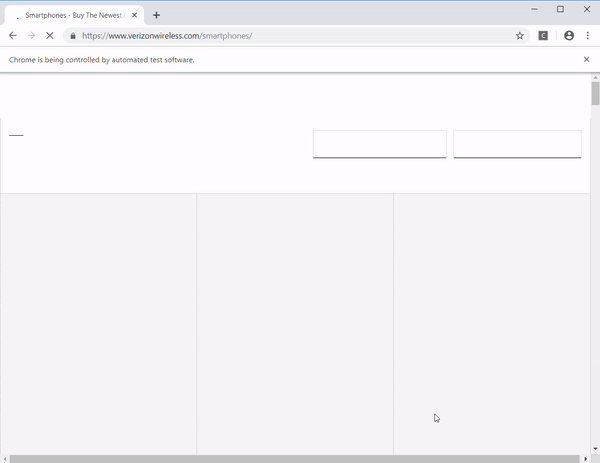

In [51]:
from IPython.display import Image
Image(filename='verizonwireless scrapping.png') 

## 3. Data Analysis
### 3.1 Data Cleaning
Three tables in MySQL were imported using peewee module for our data analysis: product, review and review_summary
- 38 Smart Phone models
- 30501 reviews

In [52]:
from db import *
import pandas as pd

# read dataframe from SQL tables: review, product, summary
review = Review()
product = Product()
review_summary = Review_summary()
review_records = review.select()
product_records = product.select()
summary_records = review_summary.select()

In [53]:
# drop columns 'id' since we are using pandas index. 
review_df = pd.DataFrame(list(review_records.dicts())).drop(columns='id')
product_df = pd.DataFrame(list(product_records.dicts())).drop(columns='id').drop_duplicates()
summary_df =pd.DataFrame(list(summary_records.dicts())).drop(columns='id')

In [54]:
# checking dataframe columns, sizes, 
print('size of review dataframe: ',review_df.shape)
print(review_df.info())
print(review_df.head(2))

size of review dataframe:  (30501, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30501 entries, 0 to 30500
Data columns (total 10 columns):
date_published    30501 non-null datetime64[ns]
helpful           30501 non-null int64
rating            30501 non-null int64
recommending      30501 non-null object
skuId             30501 non-null object
store             30501 non-null object
text              30501 non-null object
title             30501 non-null object
unhelpful         30501 non-null int64
username          30501 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 2.3+ MB
None
       date_published  helpful  rating recommending      skuId    store  \
0 2019-01-04 18:42:41     9074       5         True  MT6F2LL/A  verizon   
1 2019-02-03 18:42:41     1401       5         True  MT6F2LL/A  verizon   

                                                                                                                                                   

In [55]:
print('size product dataframe: ',product_df.shape)
print(product_df.info())
print(product_df.head(2))
print('phone models: ',product_df[['brand','price']].drop_duplicates().shape)

size product dataframe:  (1133, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1133 entries, 0 to 1132
Data columns (total 9 columns):
brand           1133 non-null object
color           1133 non-null object
price           1133 non-null float64
product_name    1133 non-null object
skuId           1133 non-null object
spec_name       1133 non-null object
spec_value      1133 non-null object
storage         1133 non-null object
store           1133 non-null object
dtypes: float64(1), object(8)
memory usage: 88.5+ KB
None
   brand                       color    price         product_name      skuId  \
0  Apple  Silver, Gold, Space Gray,   1099.99  Apple iPhone XS Max  MT6F2LL/A   
1  Apple  Silver, Gold, Space Gray,   1099.99  Apple iPhone XS Max  MT6F2LL/A   

      spec_name  \
0  World Device   
1  LTE Advanced   

                                                                 spec_value  \
0                       Works in over 200 countries depending on your plan.   
1  With

In [56]:
print('size review summary dataframe: ',summary_df.shape)
print(summary_df.info())
print(summary_df.head(2))

size review summary dataframe:  (38, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
batterylife    38 non-null object
design         38 non-null object
display        38 non-null object
feature        38 non-null object
skuId          38 non-null object
storage        38 non-null object
dtypes: object(6)
memory usage: 1.9+ KB
None
  batterylife design display feature       skuId storage
0         4.4    4.6     4.6     4.4   MT6F2LL/A     4.6
1         4.5    4.4     4.4     3.0  SMG975UZBV     4.6


Trim phone model name to 20 characters and merge product_df to summary_df


### 3.2 Brand, Models
#### Brand: 5 major,  Apple, Samsung, Google, LG and Motorola
#### Models: Apple has 14, Samsung has 9, Google has 4, LG has 4, and Motorola has 3 models.

### 3.3 Price
#### Apple 
\\$200 - \$1200 
#### Samsung 
\\$200 - \$1100 
#### Google
\\$600 - \$1000
#### LG 
\\$600 - $1000 
#### Motorola 
\\$100 - \$500 

In [57]:
pd.set_option('display.max_columns',20)
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,6)

In [58]:
import seaborn as sns

# limit model name length to 20 characters
product_df['product_name']=product_df['product_name'].apply(lambda x: x[:20].strip())
# rename column 'storage' to 'memory'
product_df.columns = ['brand', 'color', 'price', 'product_name', 'skuId', 'spec_name', 'spec_value', 'memory', 'store']
# combine product dataframe with summary dataframe to create a new dataframe 'new_product'
new_product = product_df.merge(summary_df, how='right', on='skuId')
new_product.head(2)

brand                       color    price         product_name      skuId  \
0  Apple  Silver, Gold, Space Gray,   1099.99  Apple iPhone XS Max  MT6F2LL/A   
1  Apple  Silver, Gold, Space Gray,   1099.99  Apple iPhone XS Max  MT6F2LL/A   

      spec_name  \
0  World Device   
1  LTE Advanced   

                                                                 spec_value  \
0                       Works in over 200 countries depending on your plan.   
1  With 50% faster peak speeds in more than 450 cities from coast to coast.   

  memory    store batterylife design display feature storage  
0   64GB  verizon         4.4    4.6     4.6     4.4     4.6  
1   64GB  verizon         4.4    4.6     4.6     4.4     4.6

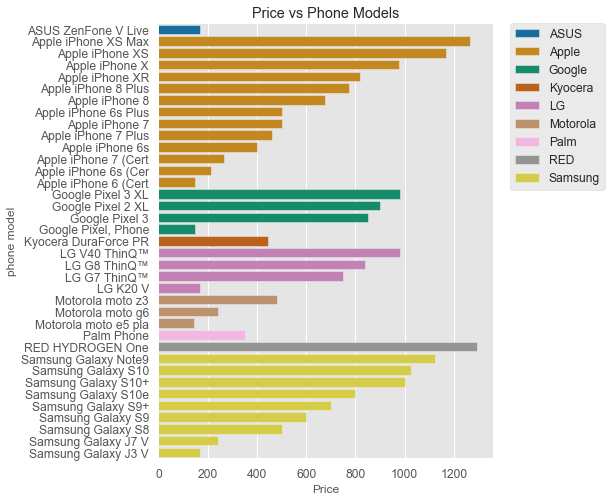

In [59]:
# there are multiple entries for the same phone model but with different memory size, 
# so a phone model price comes from the mean of difference memory price 
# each spec_name and spec_value also takes a seperate entry for the same phone model 
avg_price= pd.DataFrame(product_df.groupby(['brand','product_name'])['price'].mean() )
avg_price.columns = ['price']
avg_price = avg_price.reset_index().sort_values(by=['brand','price'], ascending=[True,False])

plt.figure(figsize=(6,8))
sns.barplot(data=avg_price, y='product_name',x='price',hue='brand', dodge=False, palette="colorblind")
plt.ylabel('phone model')
plt.xlabel('Price')
plt.title("Price vs Phone Models")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

Text(0.5, 1.0, 'Number of Models vs Brand')

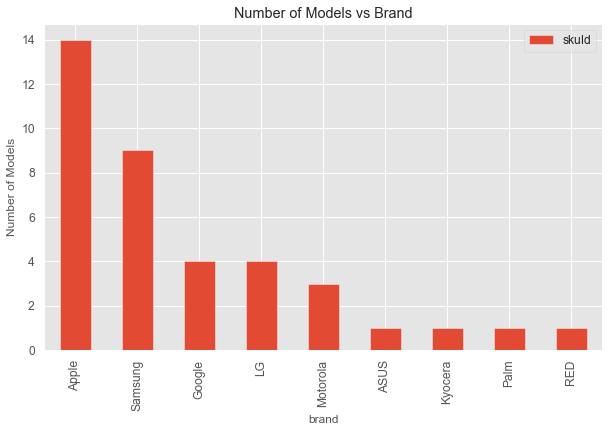

In [60]:
# counting models from each brand
models = product_df[['brand','skuId']].drop_duplicates().groupby('brand').count().sort_values(by=['skuId'], ascending=False)

models.plot.bar()
plt.ylabel('Number of Models')
plt.title("Number of Models vs Brand")

Text(0.5, 1.0, 'Phone Price vs Brand')

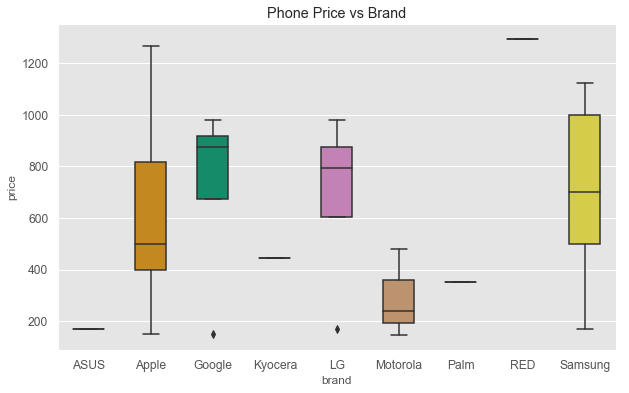

In [61]:
# boxplot on price range for each brand
import seaborn as sns

price_brand= new_product.pivot_table(values='price', index=['brand','product_name'])
price_brand.index = price_brand.index.droplevel(level=1)
price_brand = price_brand.reset_index()
sns.boxplot(y='price',x='brand',data=price_brand, width=0.5, palette="colorblind")
plt.title("Phone Price vs Brand")



### 3.3 Rreviews
#### Popularity:
We consider popularities is connected to the number of reviews on a phone model. Apple has the most popular models (iPhone 6 and 7), next are LG G7, Samsung Galaxy S8 and Google Pixel 2 XL.
#### Buy Recommendation:
The Votes for "BUY" in the order:
- LG 
- Apple
- Samsung
- Motorola
- Google

#### Overall Ratings
Apple phones have the larger range across all the 5 rating group in regards to raw count, Samsung phones have a larger number of 1 ratings. But in the percentage boxplot, LG phones have the highest percentage ofd 5 ratings in its own group, and Motorola phones have the highest percentage of 1-rating.




In [62]:
# combine all three dataframes into a new 'df', keeps only the interested columns from new_product dataframe, 
# remove models with review less than 10
product=new_product[['brand','skuId','product_name','design','display','feature','storage', 'batterylife']].drop_duplicates()
price_df = avg_price.reset_index().drop(columns=['brand'])

df = review_df.merge(product, how='left', on='skuId',suffixes=('_x', ''))  
df = df.merge(price_df, how='left', on='product_name').groupby(
    'skuId').filter(lambda x: x.shape[0]>10)
# convert 'recommending' column to 1 for yes, 0 for blank
df['recommending']=df.recommending.apply(lambda x: 1 if x=='True' else 0)

Text(0.5, 1.0, 'Popularity (Log of Reviews) vs Brand')

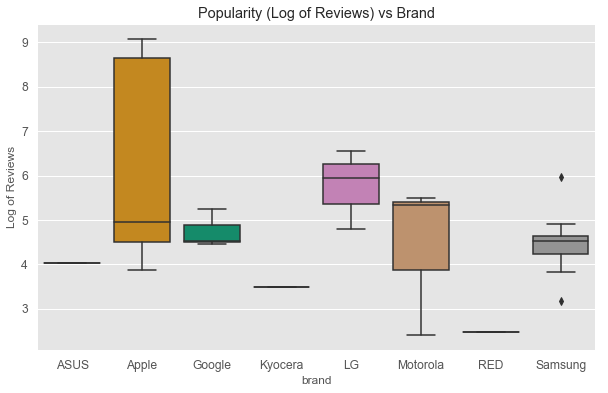

In [63]:
import numpy as np
# some models of Apple phones has very larger number of reviews compared to other models, need to view them in log scale
# count how many reviews per model, convert the count to log, plot log count in boxplot by group of brand
popular = df.groupby('brand')['product_name'].value_counts().apply(lambda x: np.log(x))
popular_df = pd.DataFrame(popular)
popular_df.index = popular_df.index.droplevel(1)
popular_df = popular_df.reset_index()
sns.boxplot(y='product_name', x='brand',data=popular_df,palette="colorblind")
plt.ylabel("Log of Reviews")
plt.title("Popularity (Log of Reviews) vs Brand")

Text(0.5, 1.0, 'Log of Review Numbers vs Phone Models')

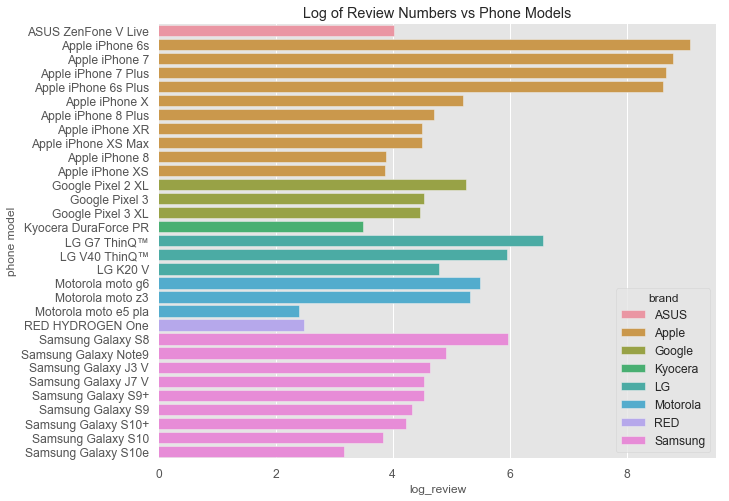

In [64]:
# bar chart for Review numbers against phone model in review log scale
popular_df = pd.DataFrame(popular)
popular_df.columns=['log_review']
popular_df = popular_df.reset_index()
plt.figure(figsize=(10,8))

sns.barplot(data=popular_df,y='product_name', x='log_review',hue='brand', dodge=False)
plt.ylabel('phone model')
plt.title('Log of Review Numbers vs Phone Models')

#### Ratings

- pie chart shows Apple and LG phones have higher percentage on 5-rating, 
- Samsung and Google phones have high percent 1-rating
- boxplot chart shows Apple phones have big range on rating counts

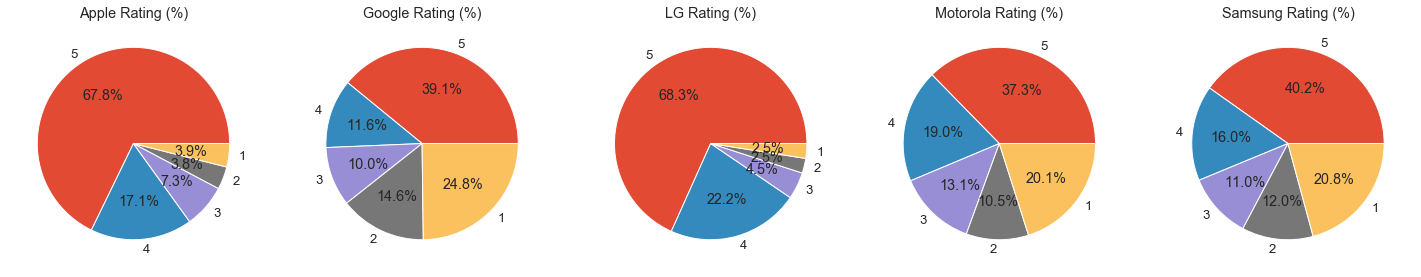

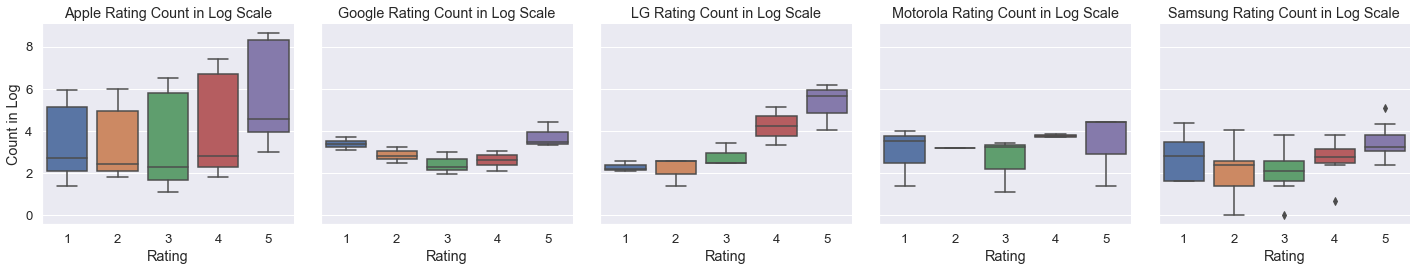

In [65]:
# ratings

def filter_brand(x):
    keep_list= ['brand','design', 'display', 'feature', 'storage', 'batterylife']
    return (x['brand'] in ['Apple','Google','LG','Motorola', 'Samsung'])

# calculate 5, 4, 3, 2, 1 rating count, subset dataset on models in keep_list
# convert count into log
rating_df = pd.DataFrame(df.groupby(['brand','product_name'])['rating'].value_counts())
rating_df.columns=['count']
rating_df['count'] = rating_df['count'].apply(lambda x: np.log(x))
rating_df.index=rating_df.index.droplevel(level=1)
rating_df = rating_df.reset_index()
rating_df = rating_df.loc[rating_df.apply(filter_brand, axis=1)]
fig, axs = plt.subplots(1, 5, figsize=(5*5,5), subplot_kw={'aspect':'equal'})
# boxplot chart on brand group
sns.set(font_scale=1.2)
g = sns.catplot(kind='box',y='count', x='rating', col='brand', data=rating_df,legend=True, height=4, aspect=1)    
g.set_titles("{col_name}" + " Rating Count in Log Scale")
g.set_axis_labels("Rating", "Count in Log")

# prepare the same data (without log conversion) to pie chart
# sorting and setting the index on rating column
df1=df[['brand','product_name','rating']]
df1 = df1.loc[df1.apply(filter_brand, axis=1)].groupby(['brand','rating']).count()
df1.columns=['count']
df1= df1.reset_index()
df1 = df1.sort_values(by=['rating','count'], ascending=[False,False]).set_index('rating')
N=rating_df['rating'].drop_duplicates().shape[0]

for ax,(groupname,subdf) in zip(axs,df1.groupby('brand')):
    ax.pie(subdf['count'], labels=subdf.index, autopct='%.1f%%')
    ax.set_title(groupname + " Rating (%)")



#### iPhone 6s Plus, iPhone 7 Plus (\\$460, $500) have higher percentage of 5-rating
#### iPhone XS and iPhone 8 have the worst 5-rating

                            price
product_name                     
Apple iPhone XS Max   1266.656667
Apple iPhone XS       1166.656667
Apple iPhone X         974.990000
Apple iPhone XR        816.656667
Apple iPhone 8 Plus    774.990000
Apple iPhone 8         674.990000
Apple iPhone 6s Plus   499.990000
Apple iPhone 7         499.990000
Apple iPhone 7 Plus    462.990000
Apple iPhone 6s        399.990000
Apple iPhone 7 (Cert   266.323333
Apple iPhone 6s (Cer   214.990000
Apple iPhone 6 (Cert   149.990000


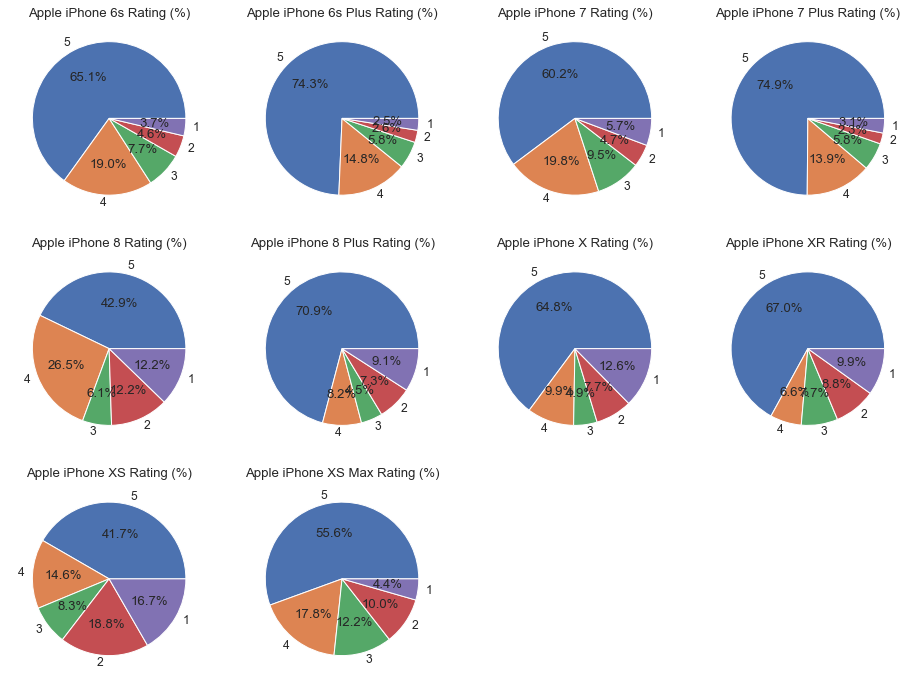

In [66]:
apple_df=df.loc[df['brand']=='Apple'][['product_name','rating']].groupby('product_name')['rating'].value_counts()
apple_df=pd.DataFrame(apple_df)
apple_df.columns=['count']
apple_df=apple_df.reset_index()

apple_df= apple_df.sort_values(by=['rating','count'], ascending=[False,False]).set_index('rating')
print(avg_price.loc[avg_price['brand']=='Apple'][['product_name','price']].set_index('product_name'))

sns.set(font_scale=1.1)
fig, axs = plt.subplots(3, 4, figsize=(4*4,4*3), subplot_kw={'aspect':'equal'})
idx=0
for (groupname,subdf) in apple_df.groupby('product_name'):  
    i,j = divmod(idx,4)
    axs[i,j].pie(subdf['count'], labels=subdf.index, autopct='%.1f%%')
    axs[i,j].set_title(groupname + " Rating (%)")
    
    idx += 1
axs[2,2].set_visible(False)
axs[2,3].set_visible(False)

#### Samsung Galaxy S10+, S10e (price \\$1000, $800) have the highest 5-ratings, but S10e also has pretty high 1-rating percentage

                        price
product_name                 
Samsung Galaxy Note9  1124.99
Samsung Galaxy S10    1024.99
Samsung Galaxy S10+    999.99
Samsung Galaxy S10e    799.99
Samsung Galaxy S9+     699.99
Samsung Galaxy S9      599.99
Samsung Galaxy S8      499.99
Samsung Galaxy J7 V    240.00
Samsung Galaxy J3 V    168.00


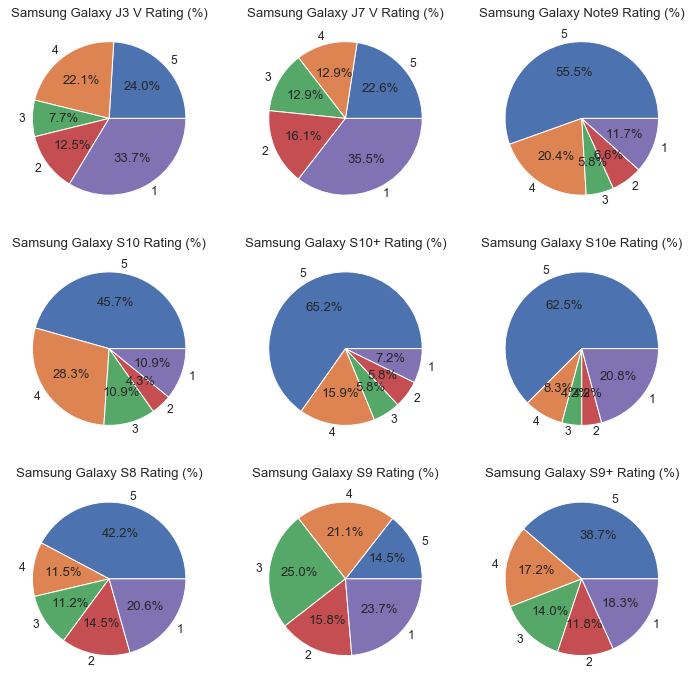

In [67]:
samsung_df=df.loc[df['brand']=='Samsung'][['product_name','rating']].groupby('product_name')['rating'].value_counts()
samsung_df=pd.DataFrame(samsung_df)
samsung_df.columns=['count']
samsung_df=samsung_df.reset_index()
samsung_df=samsung_df.sort_values(by=['rating','count'], ascending=[False,False]).set_index('rating')
print(avg_price.loc[avg_price['brand']=='Samsung'][['product_name','price']].set_index("product_name"))
fig, axs = plt.subplots(3, 3, figsize=(3*4,3*4), subplot_kw={'aspect':'equal'})
idx = 0
for (groupname,subdf) in samsung_df.groupby('product_name'):
    i,j = divmod(idx, 3)
    axs[i,j].pie(subdf['count'], labels=subdf.index, autopct='%.1f%%')
    axs[i,j].set_title(groupname + " Rating (%)")
    idx += 1


#### LG V40 has the best review, the its price \\$980 is also high
#### LG G7 has good rating, and cost only $750, is a much better deal

                price
product_name         
LG V40 ThinQ™  979.99
LG G8 ThinQ™   840.00
LG G7 ThinQ™   750.00


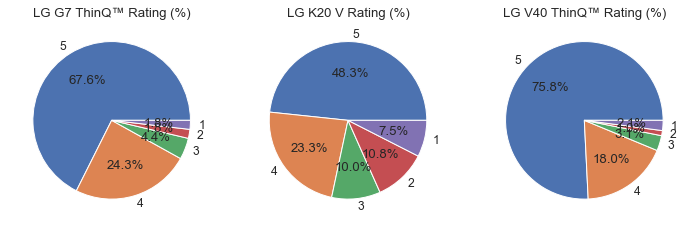

In [68]:
lg_df=df.loc[df['brand']=='LG'][['product_name','rating']].groupby('product_name')['rating'].value_counts()
lg_df=pd.DataFrame(lg_df)
lg_df.columns=['count']
lg_df=lg_df.reset_index()
lg_df=lg_df.sort_values(by=['rating','count'], ascending=[False,False]).set_index('rating')
print(avg_price.loc[avg_price['brand']=='LG'][['product_name','price']][:3].set_index('product_name'))
fig, axs = plt.subplots(1, 3, figsize=(4*3,4), subplot_kw={'aspect':'equal'})

for ax, (groupname,subdf) in zip(axs, lg_df.groupby('product_name')):
    ax.pie(subdf['count'], labels=subdf.index, autopct='%.1f%%')
    ax.set_title(groupname + " Rating (%)")
    idx += 1


#### Strip plot shows the helpful or unhelpful votes to reviews are similar 

Text(56.74591675226662, 0.5, 'Phone Model')

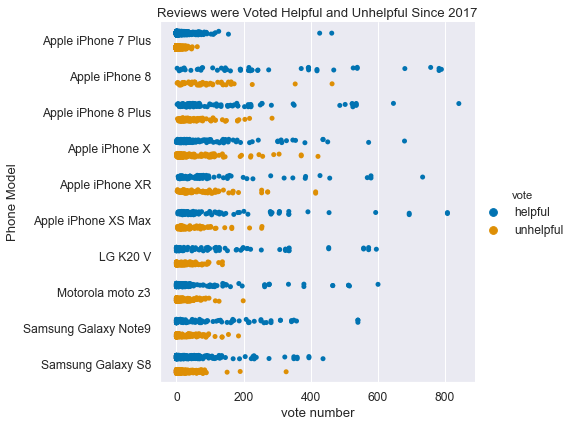

In [69]:
# subset helpfulness newer than year 2017, make strip chart on the top 10 models 
helpfulness_gt2017 = df.loc[df['date_published']>'2017'][['product_name', 'helpful', 'unhelpful']]
models=helpfulness_gt2017.groupby('product_name').agg({'helpful':'sum',\
                        'unhelpful':'sum'}).sort_values(by=['helpful',\
                        'unhelpful'], ascending=False)[:10].index

helpfulness_gt2017=helpfulness_gt2017.loc[helpfulness_gt2017.apply(lambda x: x['product_name'] in models, axis=1)]

# melt helpful and unhelpful columns into single column named vote
helpfulness_gt2017 = helpfulness_gt2017.melt(id_vars=['product_name'], var_name='vote', \
                               value_name='vote number').sort_values(by=['product_name'])
# remove outlier
helpfulness_gt2017=helpfulness_gt2017.loc[helpfulness_gt2017['vote number']<1000]

# strip plot
sns.catplot(kind='strip', x='vote number', hue='vote', y='product_name',dodge=True, \
            jitter=True,data=helpfulness_gt2017, height=6, aspect=1.2, palette="colorblind")
plt.title("Reviews were Voted Helpful and Unhelpful Since 2017")
plt.ylabel("Phone Model")

#### There is positive relation between 'helpful' and 'unhelpful' votes on reveiws 

Text(0.5, 1.0, 'Helpful vs Unhelpful')

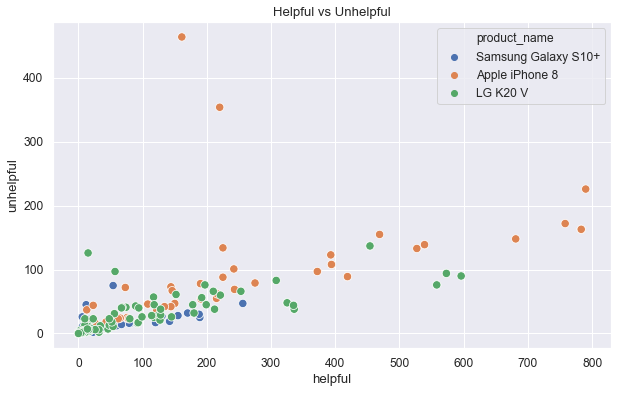

In [72]:
# scatter plot of helpfulness on 3 phone models 'Samsung Galaxy S10+', 'Apple iPhone 8', 'LG K20 V' 
models = ['Samsung Galaxy S10+', 'Apple iPhone 8', 'LG K20 V']
helpfulness = df.loc[df['product_name'].apply(lambda x: x in models)][['product_name', 'helpful', 'unhelpful']]

sns.scatterplot(x='helpful', y='unhelpful',  hue='product_name', data=helpfulness, s = 70)
plt.title("Helpful vs Unhelpful")

#### Buy Recommendation:
- iPhone 6s, 7 have the highest 'Buy' recommendations
- LG phones range the second

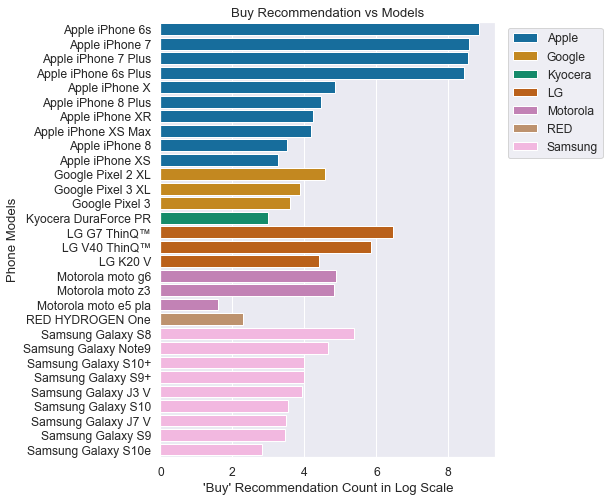

In [28]:
gp = df.groupby(['brand','product_name'])
#pct_recommend = gp['recommending'].apply(lambda x: sum(x ==1)/len(x)*100)
pct_recommend = pd.DataFrame(gp['recommending'].sum())
pct_recommend.columns = ['recommending']
pct_recommend = pct_recommend.loc[pct_recommend['recommending']>0].apply(lambda x: np.log(x), axis=1).reset_index()
pct_recommend = pct_recommend.sort_values(by=['brand','recommending'], ascending=[True, False])
#print(pct_recommend)
plt.figure(figsize=(6,8))
sns.barplot(y='product_name',x='recommending', hue='brand',data=pct_recommend, palette="colorblind", dodge=False)
plt.title('Buy Recommendation vs Models')
plt.ylabel("Phone Models")
plt.xlabel("'Buy' Recommendation Count in Log Scale")
plt.legend(bbox_to_anchor=(1.02,1.0), loc='upper left')

### Overall Rating on Sub-groups 
- iPhone models got good over 4.0 ratings the design, display, feature, storage and betterlife, except for iPhone XS with batterlife a little worse
- Samsung Galaxy Note9 got over 4.0 on all sub-group rating too

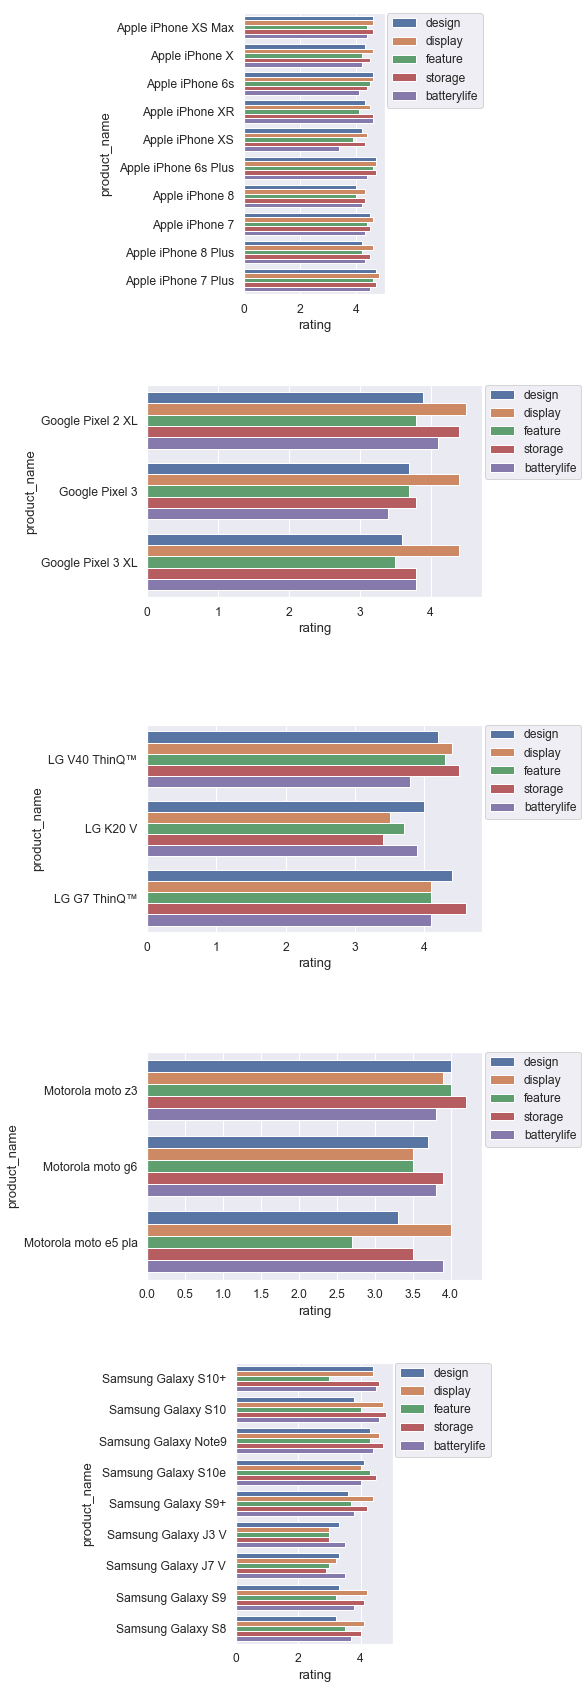

In [29]:
plot_list=['brand','product_name','design', 'display', 'feature', 'storage', 'batterylife']
sub_df = df.loc[df.apply(filter_brand, axis=1)][plot_list]
sub_df[plot_list[2:]] = sub_df[plot_list[2:]].apply(pd.to_numeric)
sub_df = sub_df.drop_duplicates()
sub_df = sub_df.melt(id_vars=['brand','product_name'],var_name='sub_group', value_name='rating')
#print(sub_df)
fig, axs = plt.subplots(nrows=5, ncols=1,  figsize=(6,5*6), subplot_kw={'aspect':'equal'})
idx=0
for (groupname,subdf) in  sub_df.groupby('brand'):  
    sns.barplot(y='product_name',x='rating',hue='sub_group', data=subdf, dodge=True, ax=axs[idx])
    #ax.set_title(groupname)
    axs[idx].legend(bbox_to_anchor=(1.01,1), loc=2, borderaxespad=0.)
    idx +=1

#plt.title("Ratings on Design, Display, Feature, Storage and BatteryLife on Phone Brand")

#### There is positive relations between price and "Buy" recommendations in phone models, except Apple brand 

C:\Users\jtlqh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Buy Recommendation')

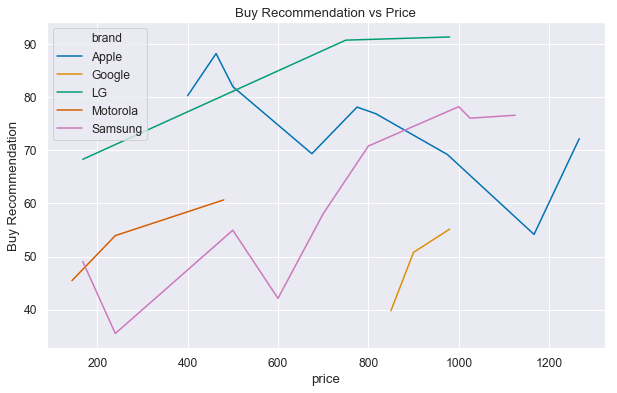

In [30]:
df1 = df[['brand','product_name','price']].drop_duplicates()
df1 = df1.loc[df1.apply(filter_brand, axis=1)]
new_df = df.groupby(['brand','product_name'])['recommending'].apply(lambda x: np.mean(x)*100)
new_df = new_df.reset_index().merge(df1, how='right', on='product_name', suffixes=('', '_y')).drop(columns=['brand_y', 'product_name'])
sns.lineplot(x='price', y='recommending', hue='brand',  data=new_df, palette="colorblind")
plt.title('Buy Recommendation vs Price')
plt.ylabel('Buy Recommendation')
#g.fig.set_size_inches(14,6)

In [45]:
import nltk
import re
df1=df.copy()
df1.columns
df1['text'] = df1['title'] + ' ' + df1['text'] 

pd.set_option('max_colwidth',200)
df1['text']=df1['text'].str.lower().apply(lambda x: re.sub('\s+', ' ', x))
#df1['text'].sample(10)

#remove punctuation
df1['text']=df1['text'].apply(lambda x: re.sub('[^\w\s]','',x))

In [46]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
#stop.extend(['iphone', '6s','plus'])
#stop.extend(['im', 'ive', 'iphone', 'x','xs', 'max', 'phone', 'due','still','phones'])
#print(stop)
df1['text']=df1['text'].apply(lambda x: " ".join(word for word in x.split() if word not in stop))

### WordCloud 
putting review content of iPhone 7 and Sumsung Galaxy S8 into WordCloud, output shows what words used frequently in reveiws.

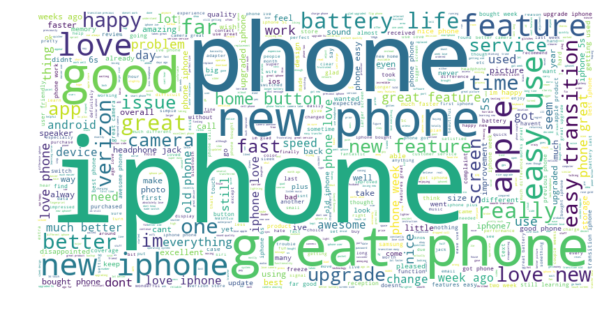

In [48]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud

mask = df1['product_name']=='Apple iPhone 7'
iphone_7 = df1[mask]
wc.generate(' '.join(iphone_7['text']))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


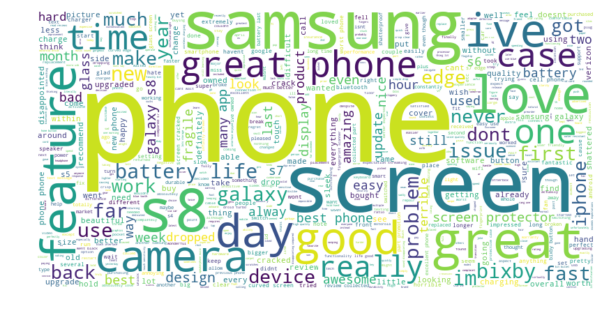

In [50]:
#wc = WordCloud(background_color="white", max_words=20000, width=800, height=400)# generate word cloud
mask = df1['product_name']=='Samsung Galaxy S8'
samsung_S8 = df1[mask]
wc.generate(' '.join(samsung_S8['text']))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## 4. Conclusions
- price has positive relation with review?
- brand name has positive relation with review?
- popular models has higher 'buy' recommendations which will help new buyers?